In [25]:
import re, nltk, numpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 

def preprocess(book):
    #removing newlines and converting to lower case. 
    #the utf-8-sig encoding ignores the Byte Order Mark ufeff while tokenizing
    text = open(book+'.txt', encoding='utf-8-sig').read().replace('\n', ' ').strip().lower()
    text = re.sub('\d+', '', text)  #removing digits and numbers
    text = re.sub('project gutenberg', '', text)
    text = re.sub('\W', ' ', text)  #removing any non alphanumeric characters
    text = re.sub('\s+', ' ', text) #removing extra white spaces
    text = re.sub('chapter \w*', '', text)   #removing chapter numbers and running sections
    return text

def frequencyDistribution(tokens):
    freq = {}
    for t in tokens:
        if t in freq:
            freq[t]+=1
        else:
            freq[t]=1
    return freq

def removeStopWords(t):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    return [i for i in t if i not in stop_words]

def generateCloud(freq):
    wc = WordCloud(height = 1000, width = 1500, background_color = 'white', max_words = 1000)
    wc.generate_from_frequencies(freq)
    return wc

def showCloud(cloud):
    plt.figure(figsize=(20,15))
    plt.imshow(cloud)
    plt.axis('off')

def plotGraph(freq, title, x_label, y_label):
    freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
    x = list(freq.keys())[:40]
    y = list(freq.values())[:40]
    plt.figure(figsize=(12,5))
    plt.plot(x,y,c='b',lw=4,ls='-.')
    plt.grid()
    plt.xticks(rotation=90)
    plt.title(title,size=17)
    plt.xlabel(x_label,size=14)
    plt.ylabel(y_label,size=14)
    plt.show()

def plotHistogram(freq, title, x_label, y_label):
    bin_size = numpy.linspace(0, 15)
    plt.figure(figsize=(25, 25))
    plt.hist(freq, bins=bin_size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [2]:
#preprocessing the text books
t1 = preprocess('book1')
t2 = preprocess('book2')

In [3]:
#tokenizing the text and creating frequency distribution
t1Tokens = nltk.tokenize.word_tokenize(t1)
t1Freq = frequencyDistribution(t1Tokens)

t2Tokens = nltk.tokenize.word_tokenize(t2)
t2Freq = frequencyDistribution(t2Tokens)

#removing stopwords
t1NewTokens=removeStopWords(t1Tokens)
t1NewFreq = frequencyDistribution(t1NewTokens)

t2NewTokens=removeStopWords(t2Tokens)
t2NewFreq = frequencyDistribution(t2NewTokens)

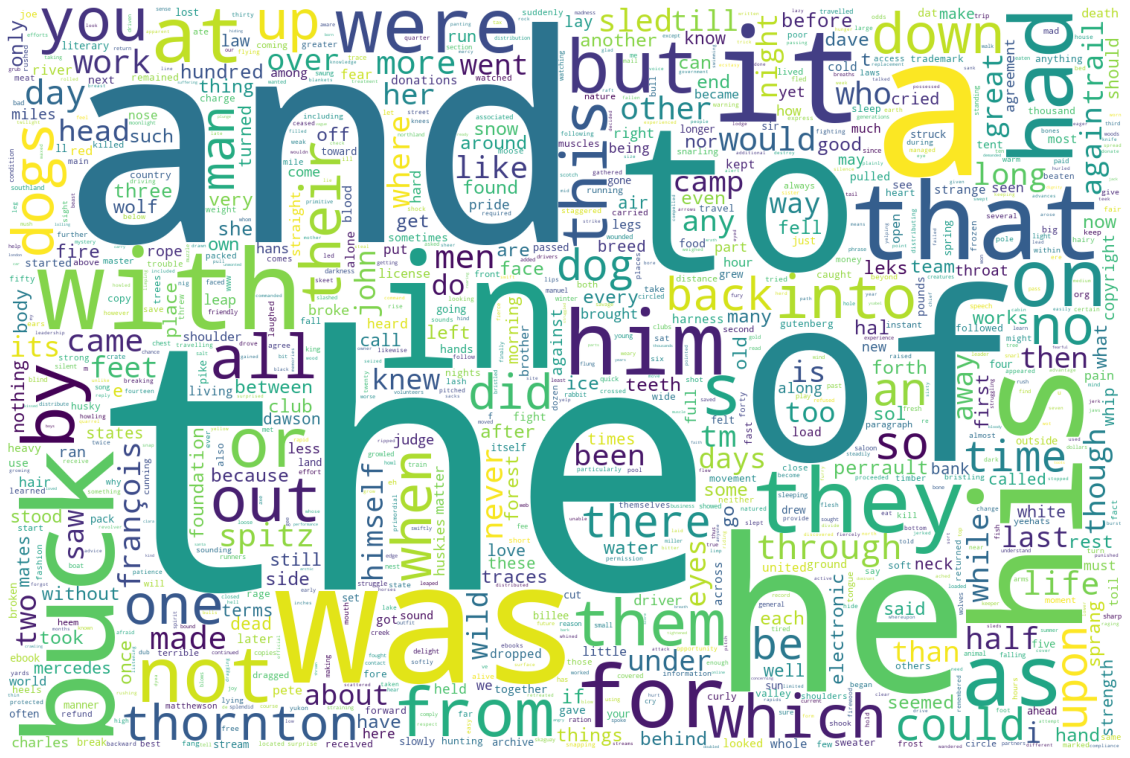

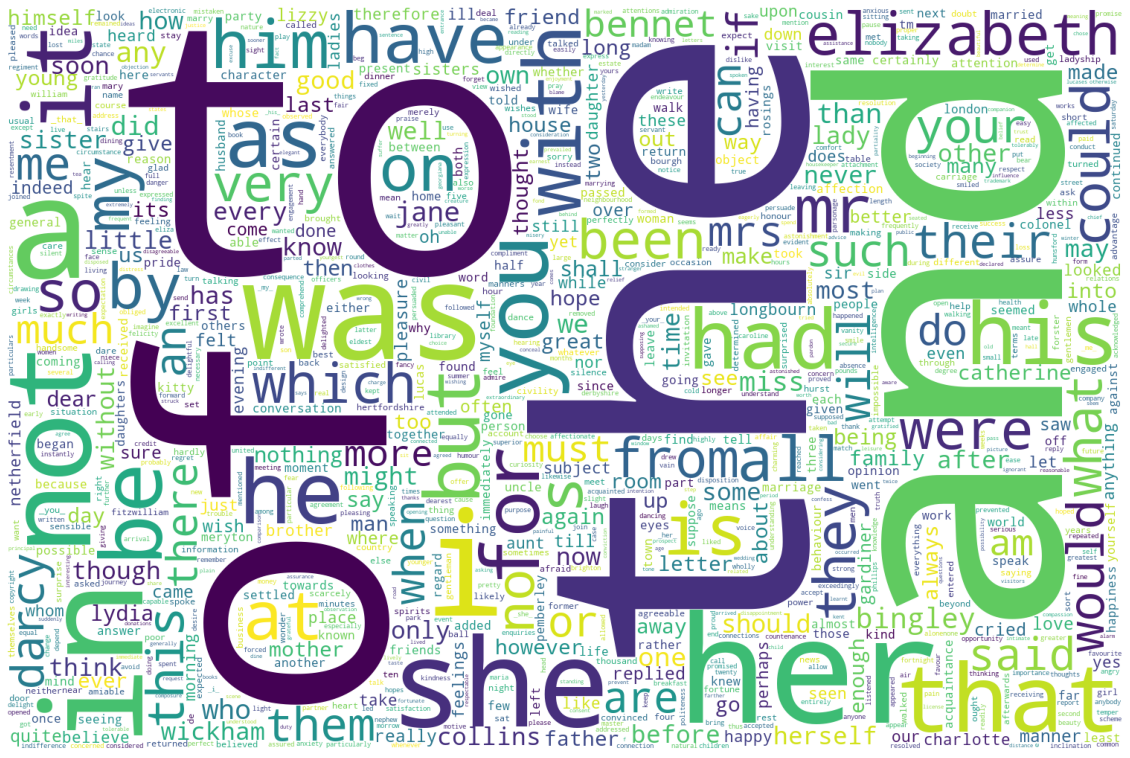

In [4]:
#creating word cloud with stopwords
t1WC = generateCloud(t1Freq)
t2WC = generateCloud(t2Freq)

showCloud(t1WC)
showCloud(t2WC)

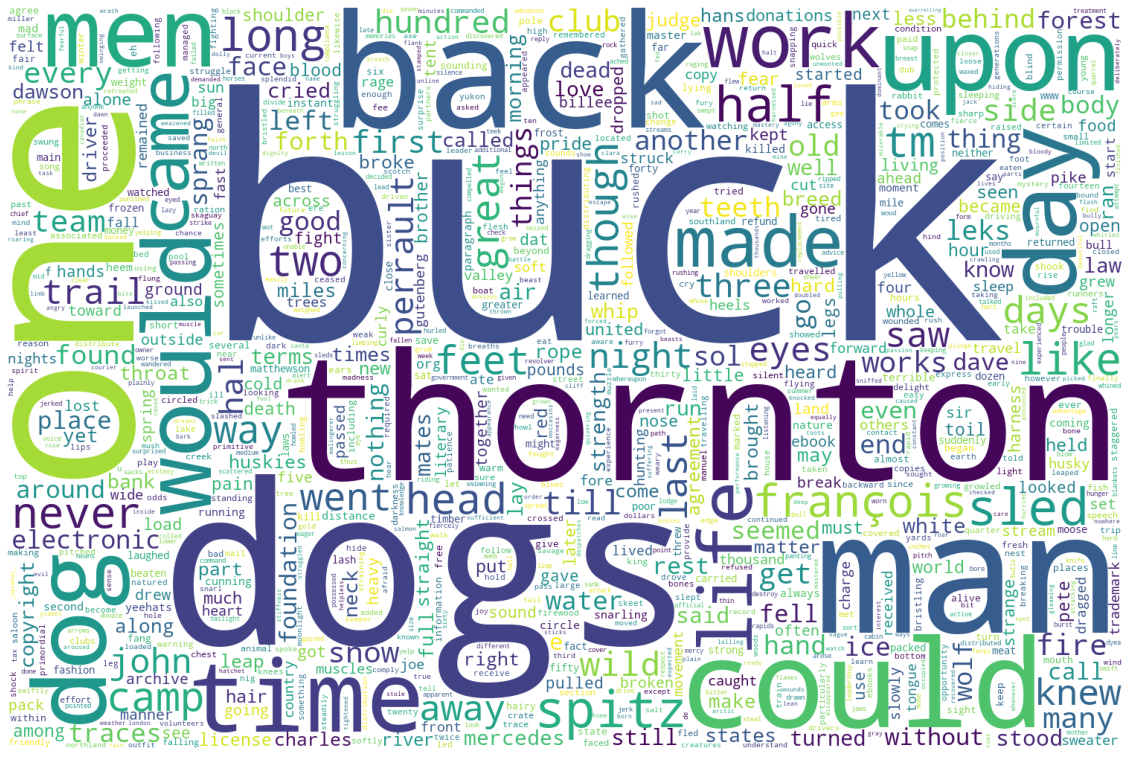

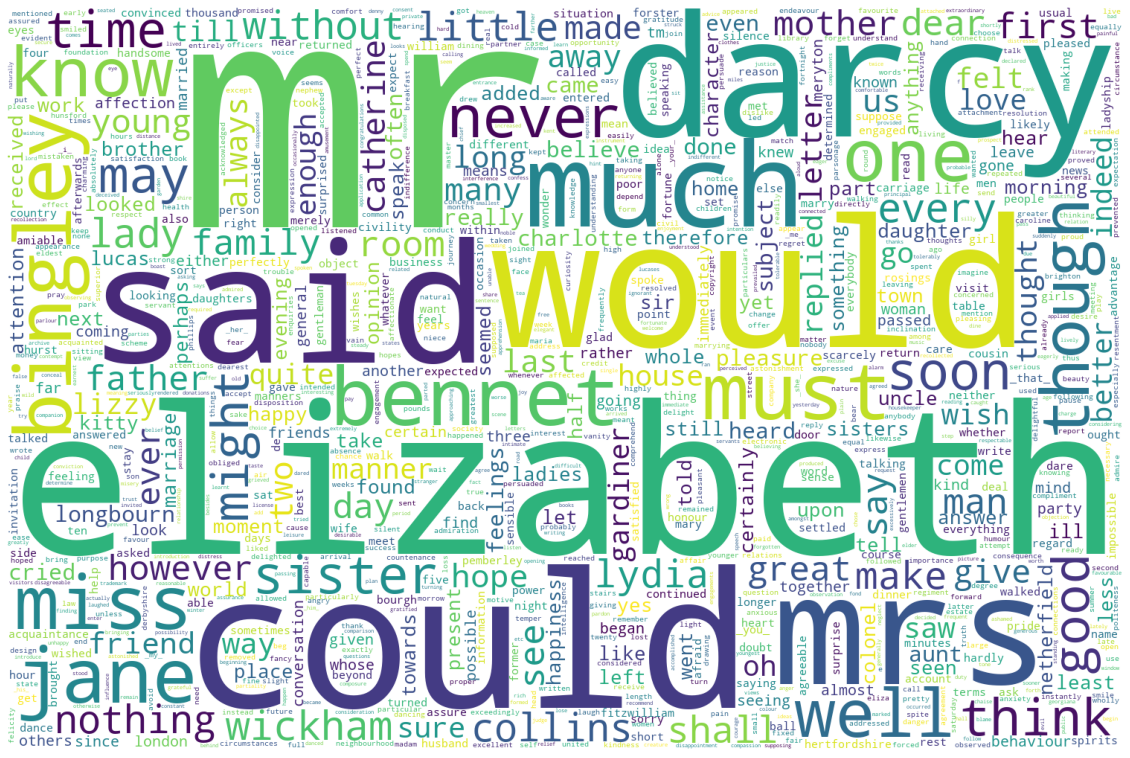

In [5]:
#creating word cloud without stopwords
t1NewWC = generateCloud(t1NewFreq)
t2NewWC = generateCloud(t2NewFreq)

showCloud(t1NewWC)
showCloud(t2NewWC)

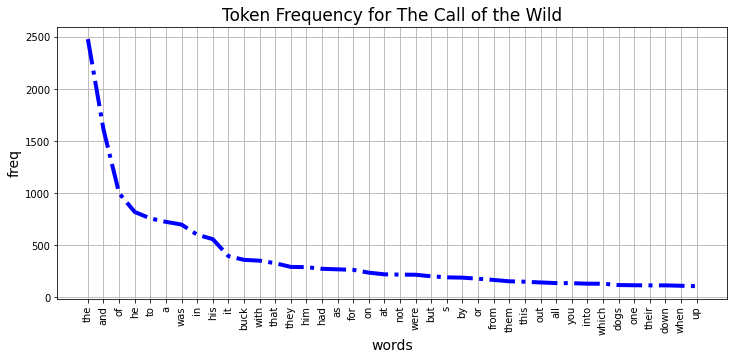

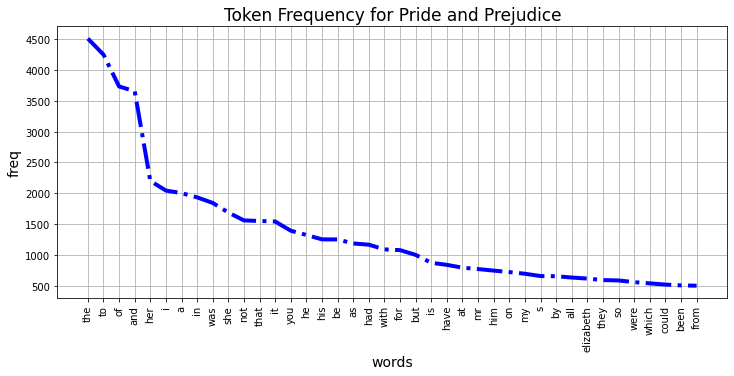

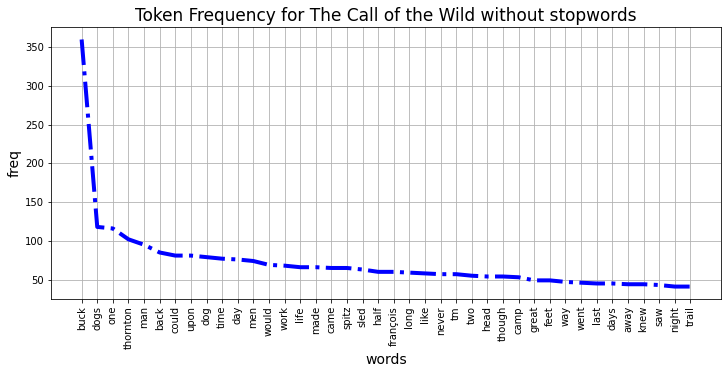

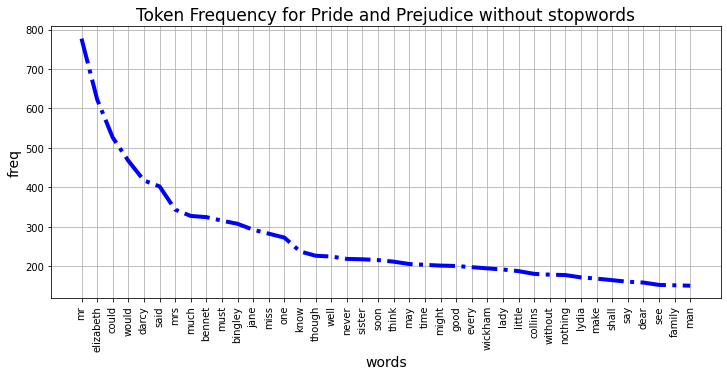

In [4]:
t1TagSet = nltk.tag.pos_tag(t1Tokens)
t2TagSet = nltk.tag.pos_tag(t2Tokens)

t1NewTagSet = nltk.tag.pos_tag(t1NewTokens)
t2NewTagSet = nltk.tag.pos_tag(t2NewTokens)

plotGraph(t1Freq, 'Token Frequency for The Call of the Wild', 'words', 'freq')
plotGraph(t2Freq, 'Token Frequency for Pride and Prejudice', 'words', 'freq')

plotGraph(t1NewFreq, 'Token Frequency for The Call of the Wild without stopwords', 'words', 'freq')
plotGraph(t2NewFreq, 'Token Frequency for Pride and Prejudice without stopwords', 'words', 'freq')

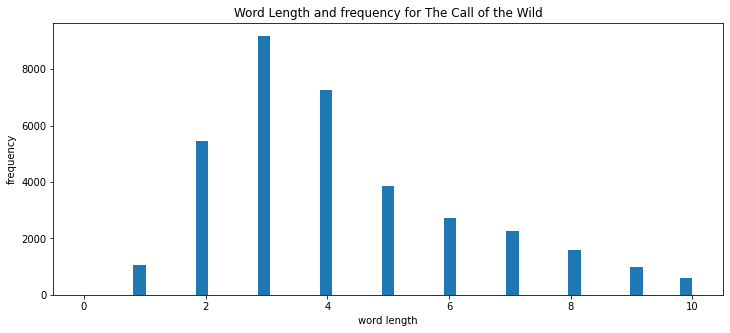

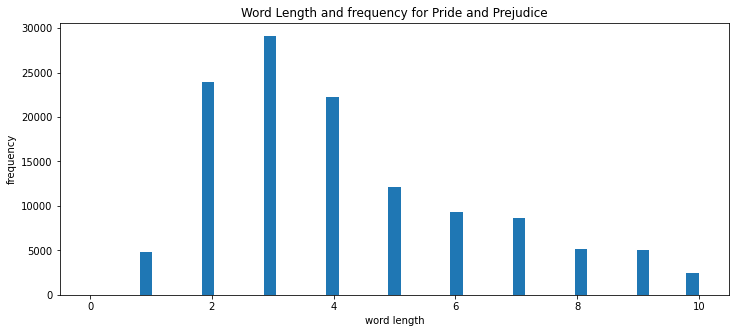

In [19]:
t1WordLength = [len(s) for s in t1Tokens]
plotHistogram(t1WordLength, 'Word Length and frequency for The Call of the Wild', 'word length', 'frequency')

t2WordLength = [len(s) for s in t2Tokens]
plotHistogram(t2WordLength, 'Word Length and frequency for Pride and Prejudice', 'word length', 'frequency')

In [71]:
# Preprocessing Book 3
t3 = preprocess('book3')
t3Tokens = nltk.tokenize.word_tokenize(t3)

In [7]:
# Finding out nouns and verbs from b1 and b2
def FilterNoun(tagset):
    noun = []
    for x in tagset:
        if x[1]=='NN':
            noun.append(x)
    return noun

def FilterVerb(tagset):
    verb = []
    for x in tagset:
        if x[1]=='VB':
            verb.append(x)
    return verb

t1Nouns = FilterNoun(t1NewTagSet)
t2Nouns = FilterNoun(t2NewTagSet)

t1Verbs = FilterVerb(t1NewTagSet)
t2Verbs = FilterVerb(t2NewTagSet)

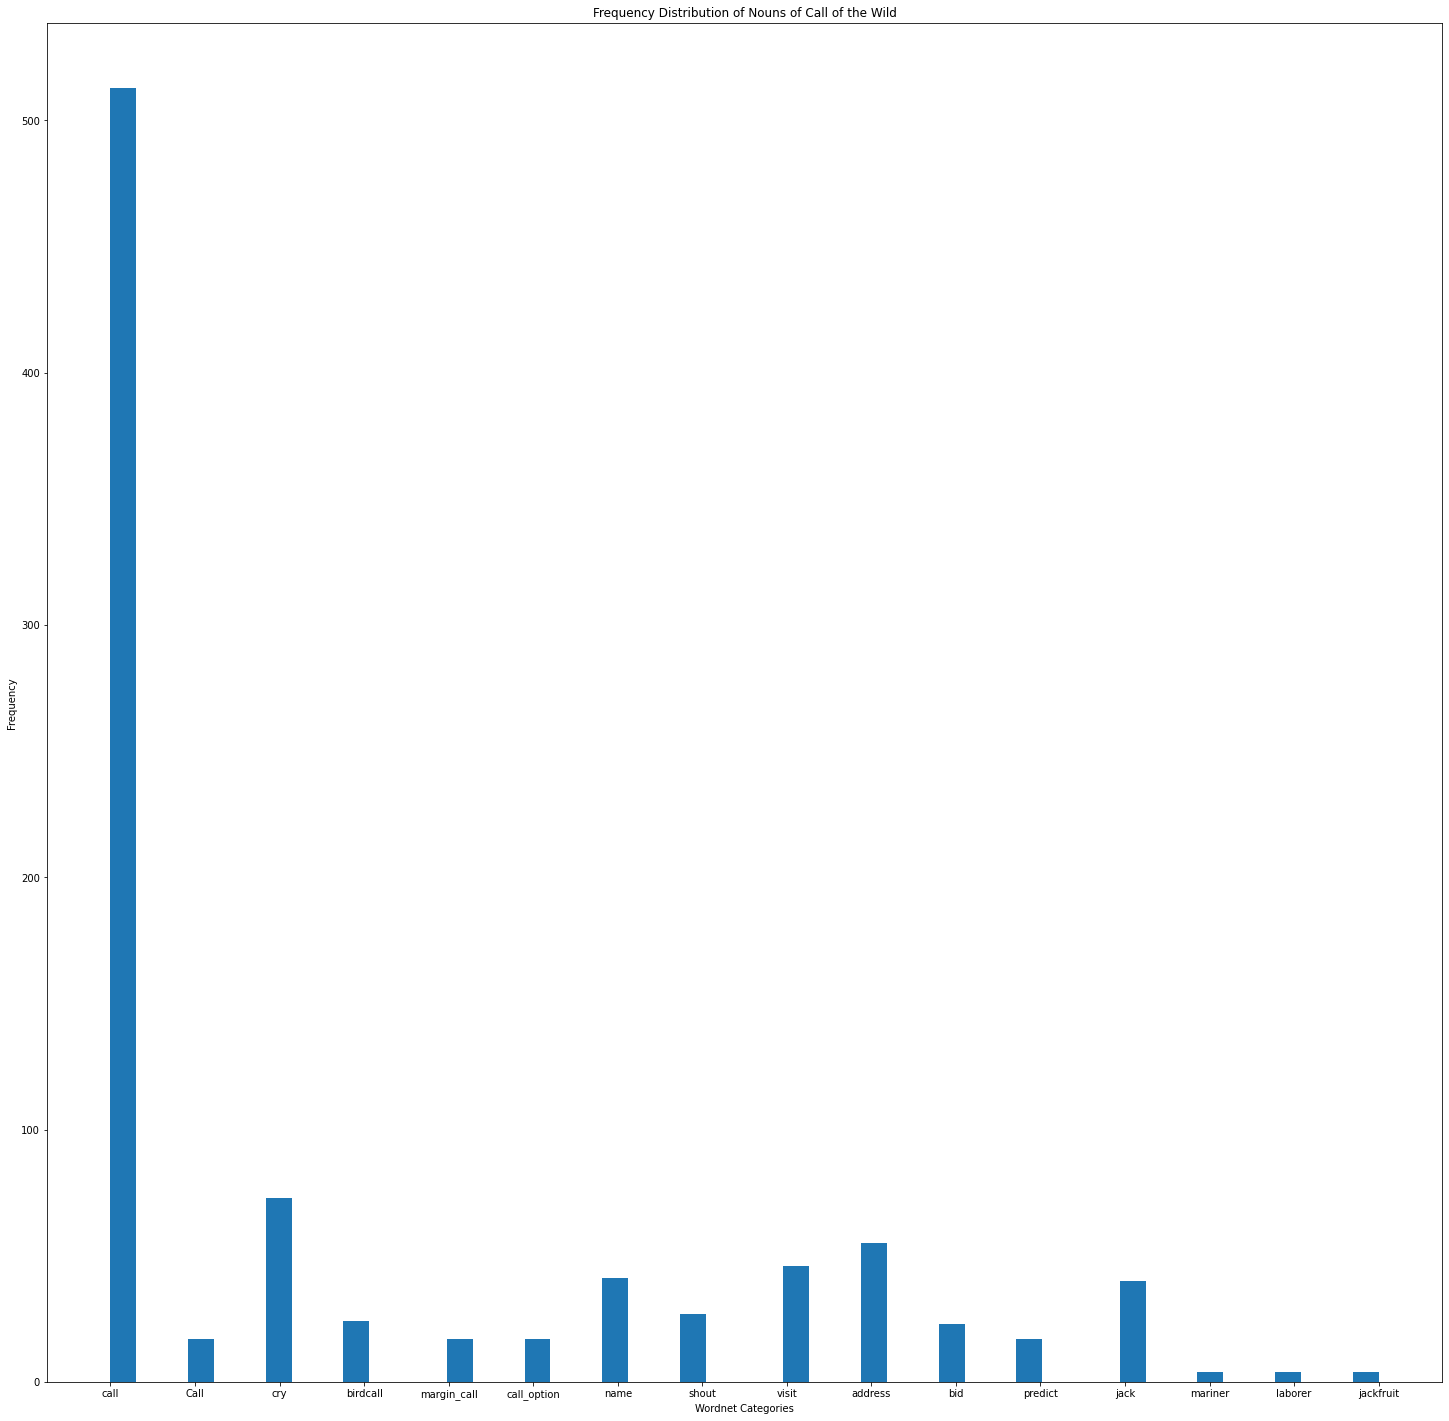

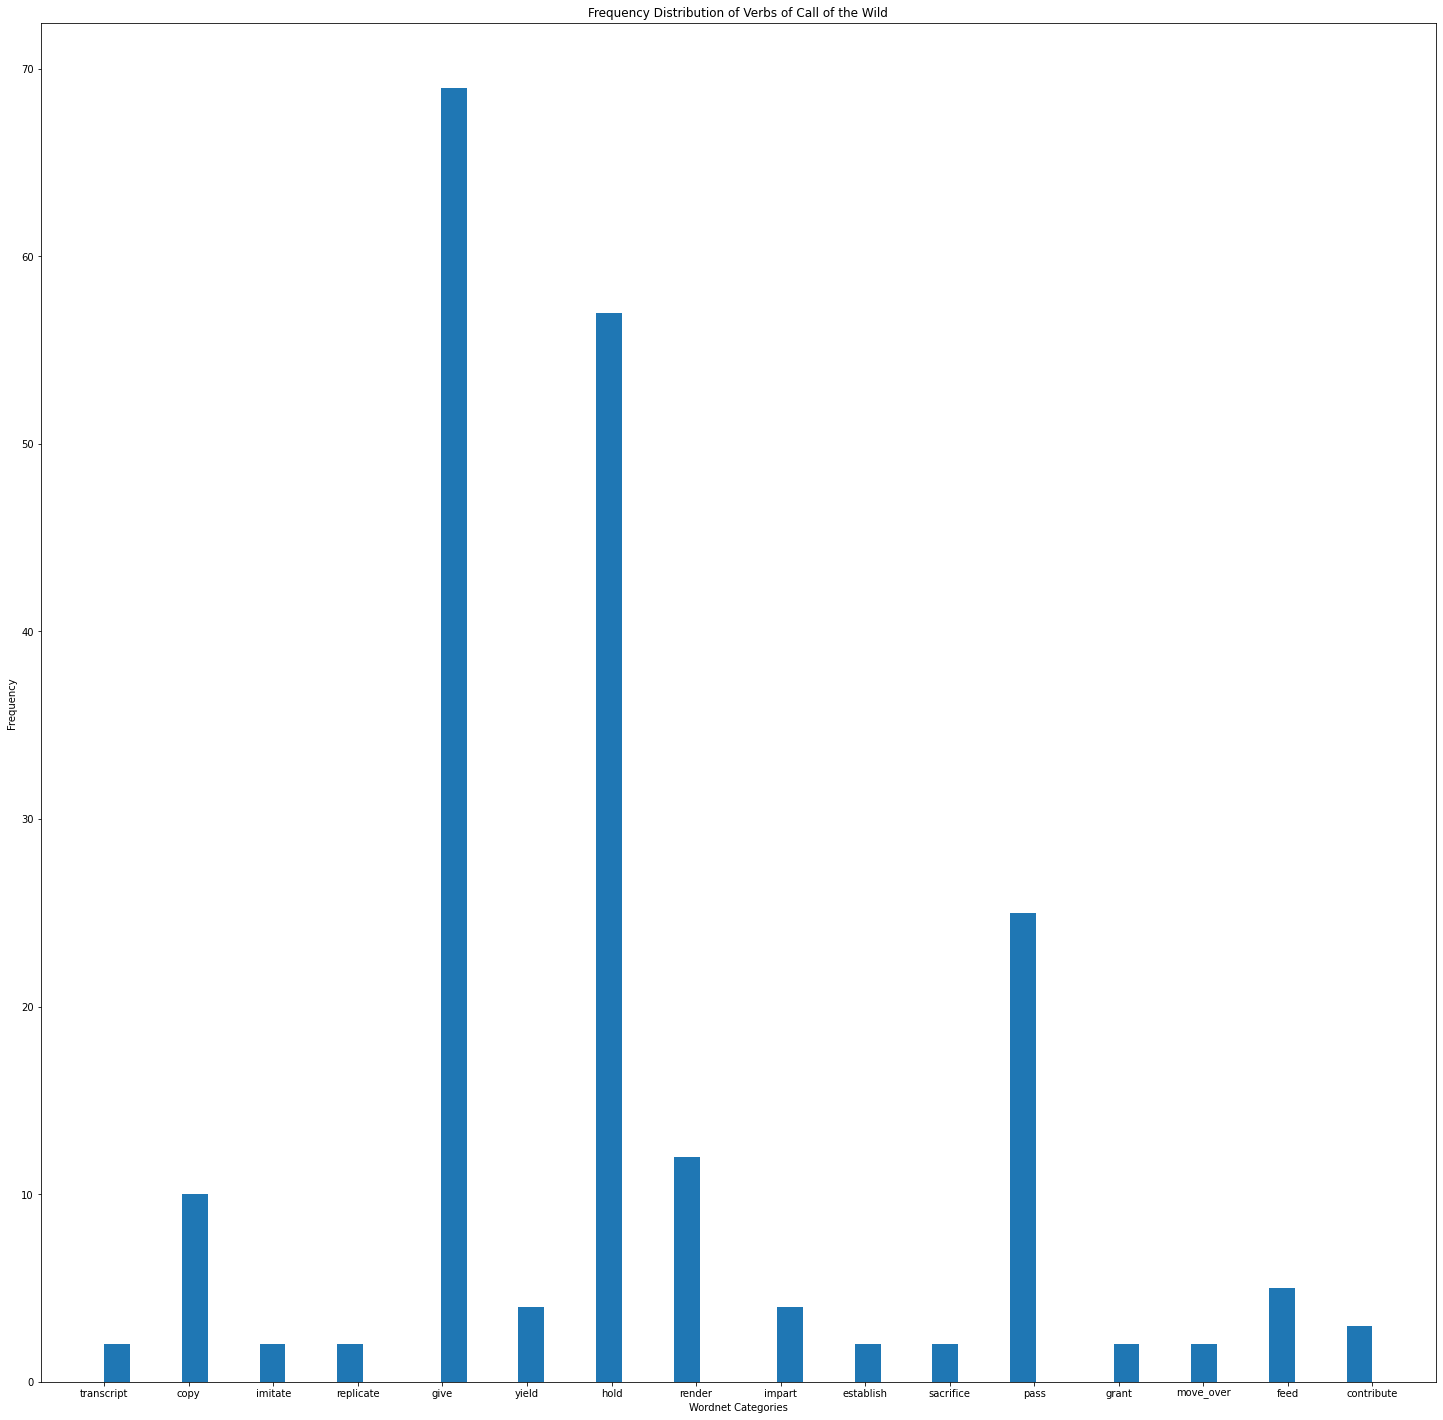

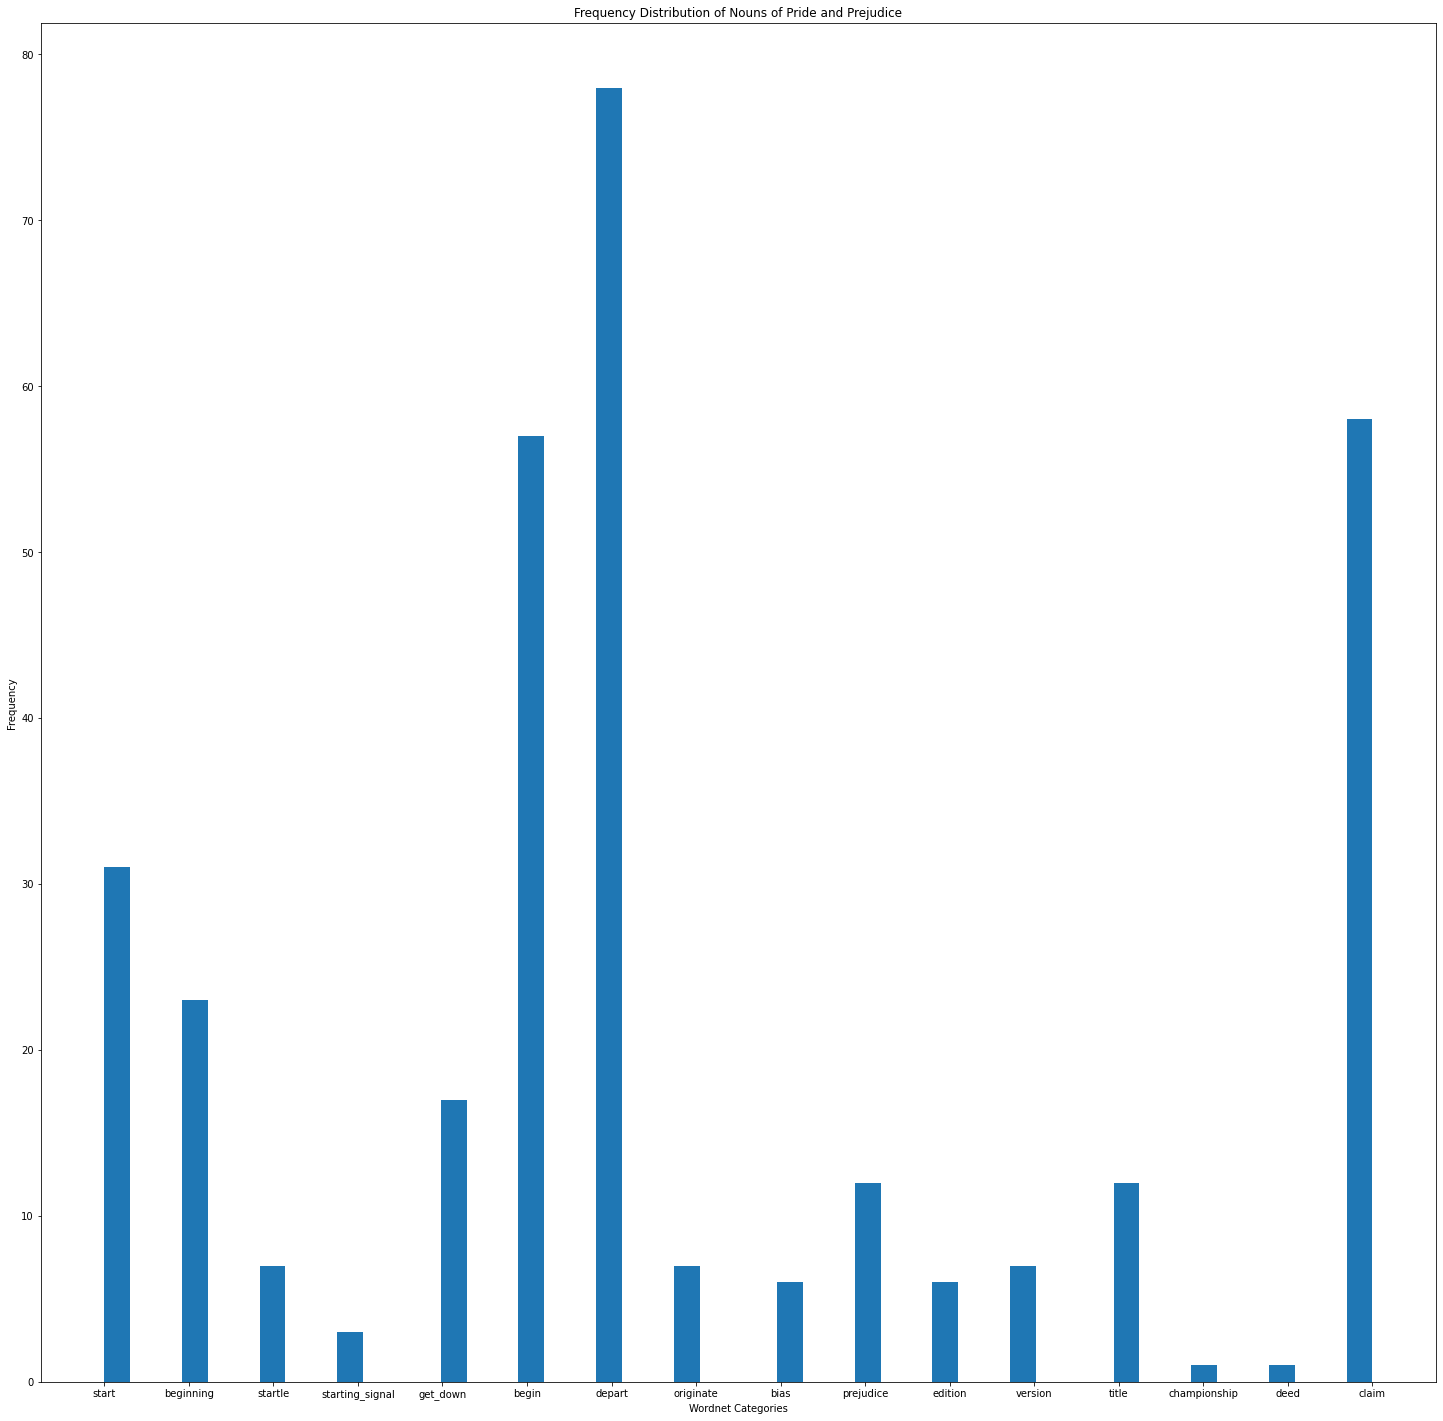

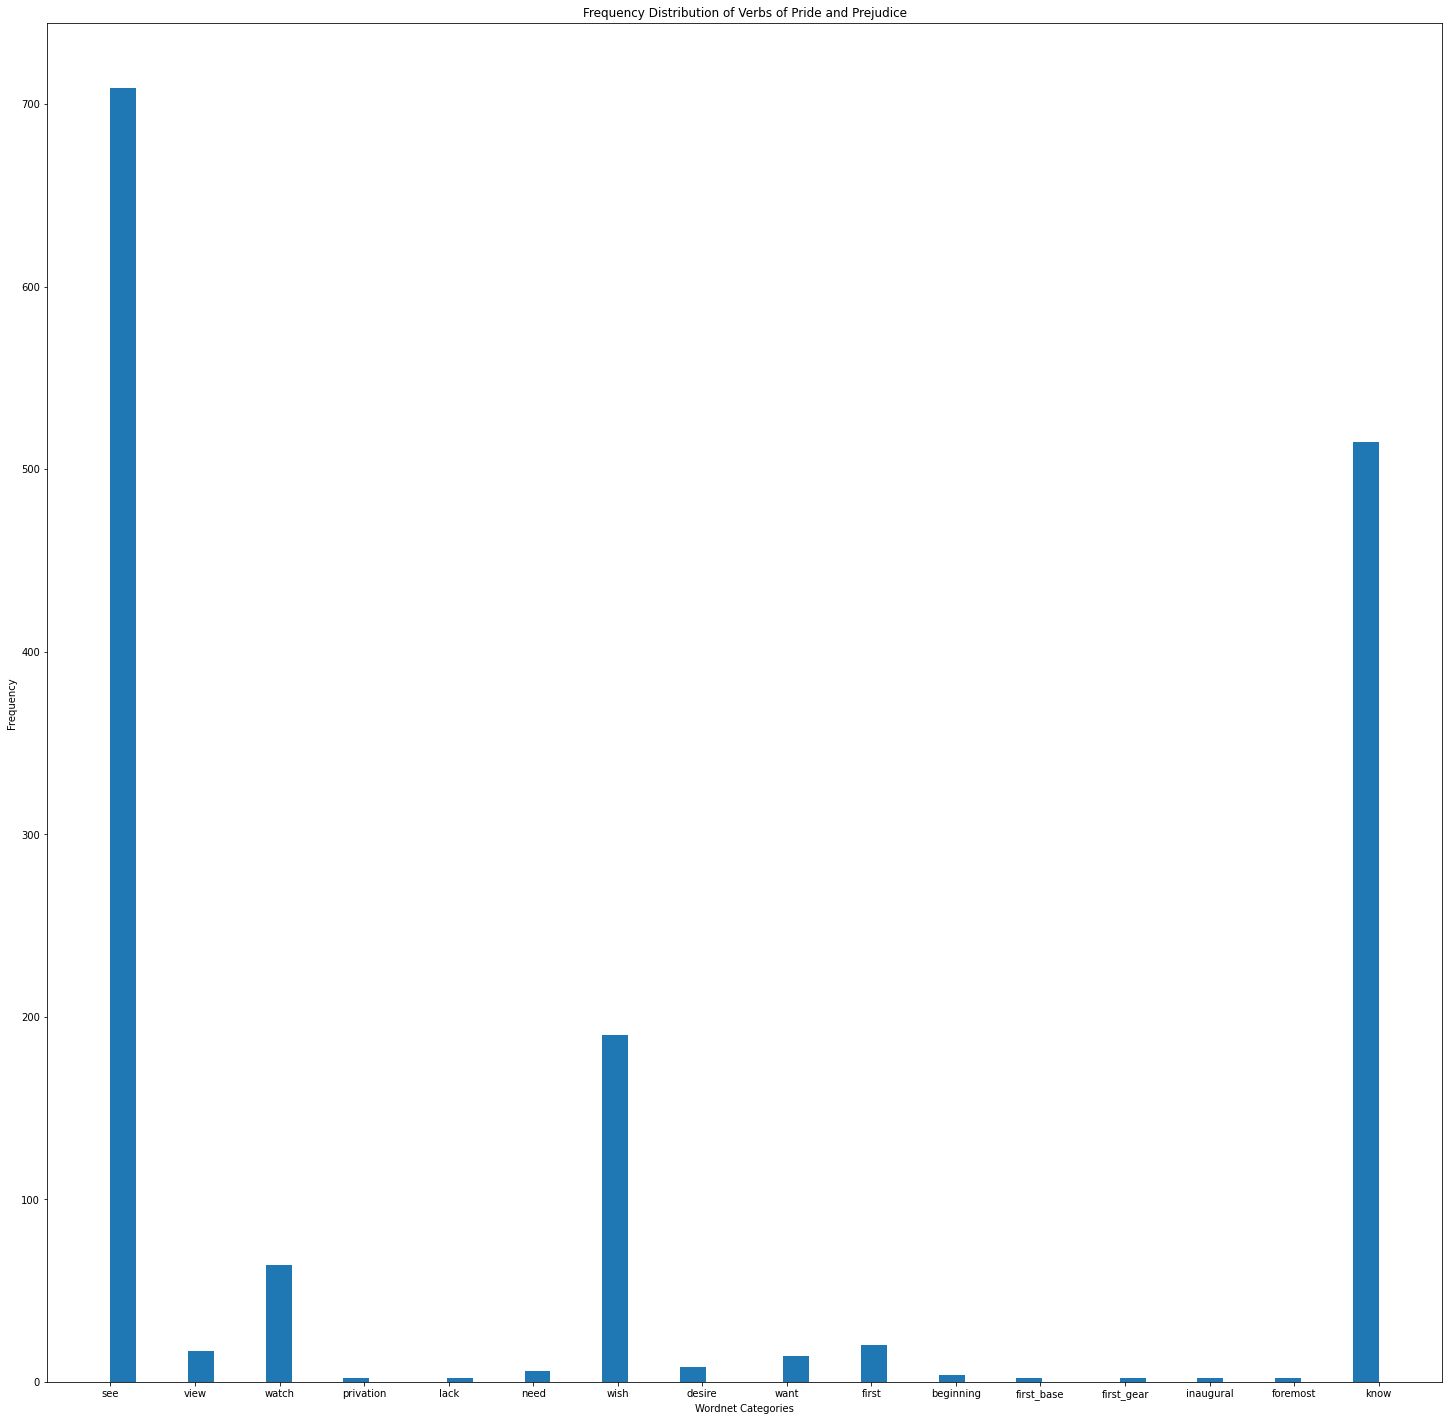

In [27]:
# Getting immediate categories from WordNet
from nltk.corpus import wordnet

def GetWordnet(tags):
    wn = []
    for x in tags:
        for synset in wordnet.synsets(x[0]):
            wn.append(synset.lemmas()[0].name())
    return wn

t1NounWordnet = GetWordnet(t1Nouns)
t1VerbWordnet = GetWordnet(t1Verbs)

t2NounWordnet = GetWordnet(t2Nouns)
t2VerbWordnet = GetWordnet(t2Verbs)

#print(frequencyDistribution(t1NounWordnet))
plotHistogram(t1NounWordnet, 'Frequency Distribution of Nouns of Call of the Wild', 'Wordnet Categories', 'Frequency')
plotHistogram(t1VerbWordnet, 'Frequency Distribution of Verbs of Call of the Wild', 'Wordnet Categories', 'Frequency')
plotHistogram(t2NounWordnet, 'Frequency Distribution of Nouns of Pride and Prejudice', 'Wordnet Categories', 'Frequency')
plotHistogram(t2VerbWordnet, 'Frequency Distribution of Verbs of Pride and Prejudice', 'Wordnet Categories', 'Frequency')

In [77]:
# Creating TF-IDF matrices of B1, B2 and B3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer(stop_words='english')
tfidf=vectorizer.fit_transform([t1, t2, t3])
print(cosine_similarity(tfidf, tfidf))

[[1.         0.13757511 0.28641757]
 [0.13757511 1.         0.37287803]
 [0.28641757 0.37287803 1.        ]]


In [78]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatizeToken(token):
    return ' '.join([lemmatizer.lemmatize(t) for t in token])

tfidfLemma = vectorizer.fit_transform([lemmatizeToken(t1Tokens), lemmatizeToken(t2Tokens), lemmatizeToken(t3Tokens)])
print(cosine_similarity(tfidfLemma, tfidfLemma))

[[1.         0.4342353  0.56071399]
 [0.4342353  1.         0.58741602]
 [0.56071399 0.58741602 1.        ]]
